In [193]:
import cv2
import matplotlib.pyplot as  plt
import numpy as np

In [194]:
#cargar el modelo de yolov4
net=cv2.dnn.readNetFromDarknet("DNN/yolov4-tiny.cfg","DNN/yolov4-tiny.weights")

In [195]:
#guardar los nombres de las etiquetas en un arreglo
classes=[]

with open("DNN\classes.txt","r") as f:
    classes=[line.strip() for line in f.readlines()]

In [196]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [197]:
img=cv2.imread("Imagenes/Ele.jpg")
#img=cv2.resize(img,(800,500))


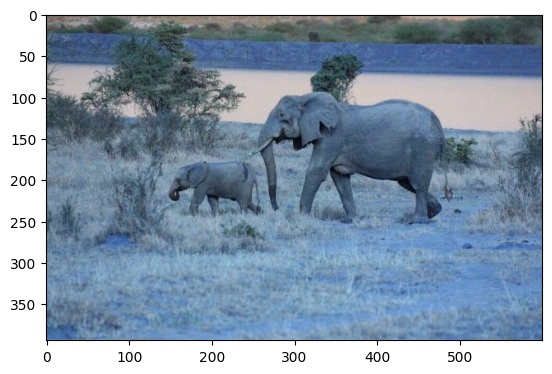

In [198]:
plt.imshow(img)

In [199]:
#obtener el alto y ancho de la imagen 
ht,wt,_=img.shape

In [200]:
#dividimos cada pixel de la imagen(para el rango de colores),cambiar el tamaño 
blob=cv2.dnn.blobFromImage(img,1/255,(416,416),(0,0,0),swapRB=True,crop=False)

In [201]:
blob.shape


(1, 3, 416, 416)

In [202]:
net.setInput(blob)

In [203]:
last_layer=net.getUnconnectedOutLayersNames()

In [204]:
layer_out=net.forward(last_layer)

In [205]:
boxes=[]
confidences=[]
class_ids=[]

for output in layer_out:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]

        if confidence>.2:
            center_x=int(detection[0]*wt)
            center_y=int(detection[1]*ht)
            w=int(detection[2]*wt)
            h=int(detection[3]*ht)

            x=int(center_x-w/2)
            y=int(center_y-h/2)

            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

        

In [206]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [207]:
if len(indexes) > 0: 
    for i in indexes.flatten():
        x,y,w,h=boxes[i]

        label=str(classes[class_ids[i]])
        confidence=str(round(confidences[i],2))
        color=colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img,label +" "+ confidence,(x,y+20),font,2,(0,0,0),2)

    cv2.imshow('Imagen',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()